### **Freelance Yard**

In [29]:
#install wanted libraries
!pip install requests
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
#import the libraries
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
%matplotlib inline
sns.set_style('darkgrid')

### **Data Collecting**

In [31]:

#creating header and lists to append the data into
header=['title','proposing agent', 'type of company', 'service category', 'post time', 'average_budget', 'proposals','Minimum_Experience_Levels' ]

titles=[]
for_who=[]
type_of_companies=[]
categories=[]
post_times=[]
average_budget=[]
links=[]
proposal=[]
experience=[]
proposals=[]
Minemum_Experience_Levels=[]
#loop for 15 pages in website
for x in range(15):

  url = 'https://freelanceyard.com/en/jobs?page='+str(x+1)
  response = requests.get(url)

  #parsing html using lxml
  soup = BeautifulSoup(response.content, 'lxml')

  #find all jobs
  lists = soup.find_all('div', {'class':'card-body'})

  #pop the unwanted first div
  lists.pop(0)

  #collect the wanted data for each div
  for i in range(len(lists)):
    title = lists[i].find('a').string
    for_whom = lists[i].find('i').next_sibling.string
    type_of_company =lists[i].find('span').string
    category = lists[i].find('b').next_sibling.string
    post_time = lists[i].find_all('b')[1].next_sibling.string
    budget = lists[i].find('i', {'class':'uil-dollar-sign'}).next_sibling.string
    link =  lists[i].find('a')['href']





    #cleaning out the output
    title = ' '.join(title.split())
    title = title.lower()
    for_whom = ' '.join(for_whom.split())
    type_of_company = ' '.join(type_of_company.split()).replace('-','')
    category = ' '.join(category.split())
    post_time = ' '.join(post_time.split())
    budget = ' '.join(budget.split()).replace('EGP','')
    budget = budget.replace('Budget:', '')
    budget = budget.split('-')
   

    #appending to list
    titles.append(title)
    for_who.append(for_whom)
    type_of_companies.append(type_of_company)
    categories.append(category)
    post_times.append(post_time)
    links.append(link)
    if len(budget)>1:
      min = int(budget[0])
      max = int(budget[1])
      avg = (min+max)/2
      average_budget.append(avg)
    else:
      average_budget.append(int(budget[0]))



#collect further data from view job page
for link in links:
        url2 = link
        responses = requests.get(url2)

        #parsing html using lxml
        soups = BeautifulSoup(responses.content, 'lxml')

        #find all info about a jop
        listed = soups.find_all('div', {'class':'card-body'})
        #collect the wanted data for each div

        proposal= listed[1].find('p', {'class':'d-inline-block'}).string
        Experience_Level= listed[0].find_all('p', {'class':'text-muted'})[3].string

        #clean inner output
        proposal=proposal.replace(' Proposals','')
        if proposal.isdigit():
           proposal=int(proposal)
       
        #appending to list
        for X in Experience_Level:
          if (X).isdigit():
           Minemum_Experience_Levels.append(int(X))
           break
          else:
            if(X=='Senior'):
              Minemum_Experience_Levels.append(5)
            if(X=='Junior'):
              Minemum_Experience_Levels.append(1)
            if(X=='Manager'):
              Minemum_Experience_Levels.append(3)

        proposals.append(proposal)





#insert all data to data frame and encode the levels to appropriate year
df = pd.DataFrame(zip(titles, for_who, type_of_companies, categories, post_times, average_budget, proposals,Minemum_Experience_Levels), columns=header)
print(df.head)


df.to_csv('freelancer.csv',index=False)

<bound method NDFrame.head of                      title           proposing agent type of company  \
0        مترجم و مدقق لغوي                Individual      Individual   
1     sales representative                Tony Costa      Individual   
2        digital marketing     Speak & Learn Academy         Startup   
3         customer service             Zeina Khattab      Individual   
4              media buyer           Mohamed Ibrahim       Corporate   
..                     ...                       ...             ...   
172  oracle apex developer                    G-Tree       Corporate   
173      admin coordinator                       TGS         Startup   
174       graphic designer  Cheetah marketing agency         Startup   
175   marketing specialist  Cheetah marketing agency         Startup   
176   marketing specialist               Royal Tours       Corporate   

                service category   post time  average_budget  proposals  \
0        Translation & Languag

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      177 non-null    object 
 1   proposing agent            177 non-null    object 
 2   type of company            177 non-null    object 
 3   service category           177 non-null    object 
 4   post time                  177 non-null    object 
 5   average_budget             177 non-null    float64
 6   proposals                  177 non-null    int64  
 7   Minimum_Experience_Levels  177 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ KB


### **Data Analysis and Visualization**

In [35]:
#analyzing the webscraped file

freelance=pd.read_csv("freelancer.csv", encoding='latin-1')

freelance.head()

,title,proposing agent,type of company,service category,post time,average_budget,proposals,Minimum_Experience_Levels
0,Ù ØªØ±Ø¬Ù Ù Ù Ø¯ÙÙ ÙØºÙÙ,Individual,Individual,Translation & Languages,30-05-2023,6500.0,2,1
1,sales representative,Tony Costa,Individual,Marketing & Sales,27-05-2023,2199.0,1,1
2,digital marketing,Speak & Learn Academy,Startup,Marketing & Sales,24-05-2023,2100.0,1,1
3,customer service,Zeina Khattab,Individual,Data Entry & Administration,11-05-2023,7500.0,3,5
4,media buyer,Mohamed Ibrahim,Corporate,Marketing & Sales,11-05-2023,11500.0,5,1


In [36]:
freelance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      177 non-null    object 
 1   proposing agent            177 non-null    object 
 2   type of company            177 non-null    object 
 3   service category           177 non-null    object 
 4   post time                  177 non-null    object 
 5   average_budget             177 non-null    float64
 6   proposals                  177 non-null    int64  
 7   Minimum_Experience_Levels  177 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 11.2+ KB


In [37]:
freelance.shape

(177, 8)

In [59]:
#Relation between budget and experience level
#created a new dataframe with the concerned columns
ddf=freelance[['Minimum_Experience_Levels','average_budget']]

#calculate the correlation.
ddf.corr()

,Minimum_Experience_Levels,average_budget
Minimum_Experience_Levels,1.000000,0.416206
average_budget,0.416206,1.000000


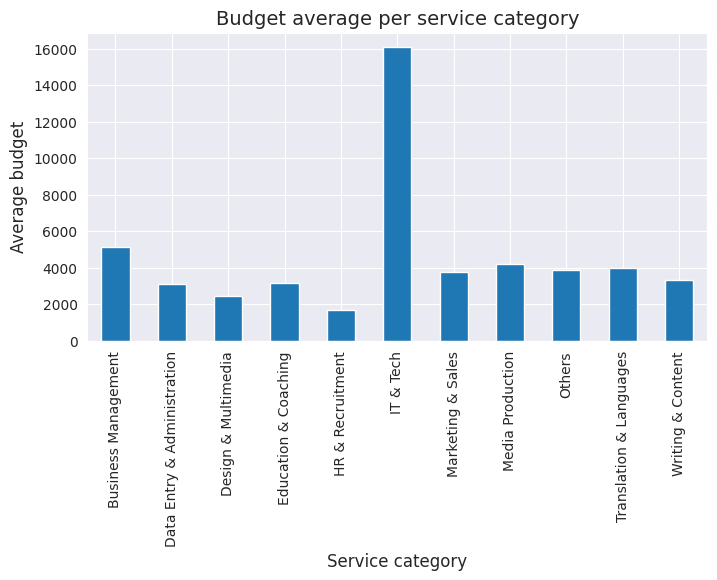

In [40]:
#Relation between budget and category

#group service categories and find the mean of the maximum budget for each category
freelance.groupby(freelance['service category'])['average_budget'].mean().plot(kind='bar', figsize=(8, 4))

#give titles for the graph
plt.title("Budget average per service category", fontsize=14)
plt.xlabel('Service category', fontsize=12)
plt.ylabel('Average budget', fontsize=12)
plt.show()

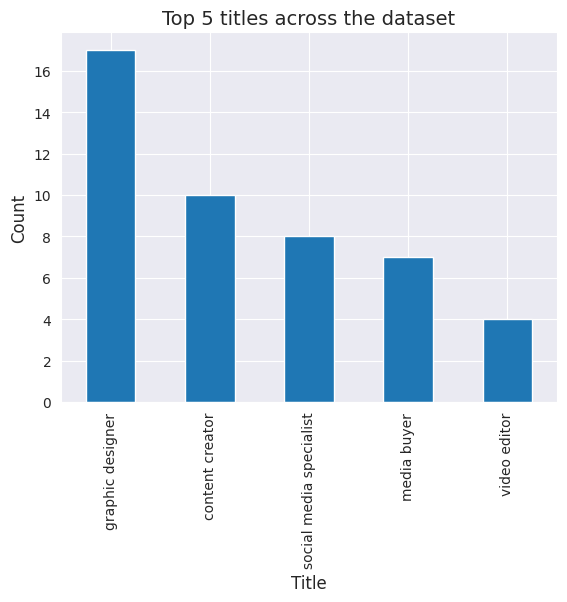

In [41]:
#The most popular job title in all fields

#lower case the titles to find the accurate mode for the title attribute in the whole dataset
freelancerr= freelance
freelancerr['title']= freelancerr['title'].str.lower()
#We took the top 5 most popular 
freelancerr['title'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 titles across the dataset", fontsize=14)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

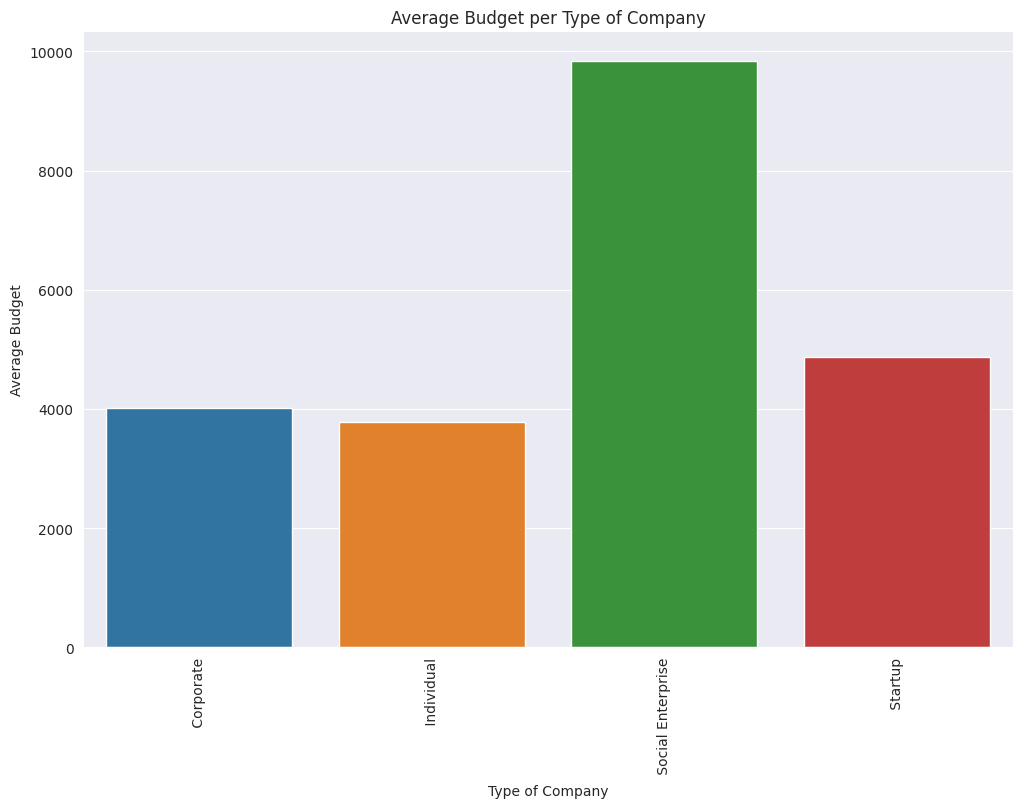

In [55]:
#Relationship between the proposing agent and budget.
# Display a scatterplot to show the relationship
average_budget_per_company = df.groupby('type of company')['average_budget'].mean()

plt.figure(figsize=(12,8))
sns.barplot(x=average_budget_per_company.index, y=average_budget_per_company.values)
plt.xlabel('Type of Company')
plt.ylabel('Average Budget')
plt.title('Average Budget per Type of Company')
plt.xticks(rotation=90)
plt.show()

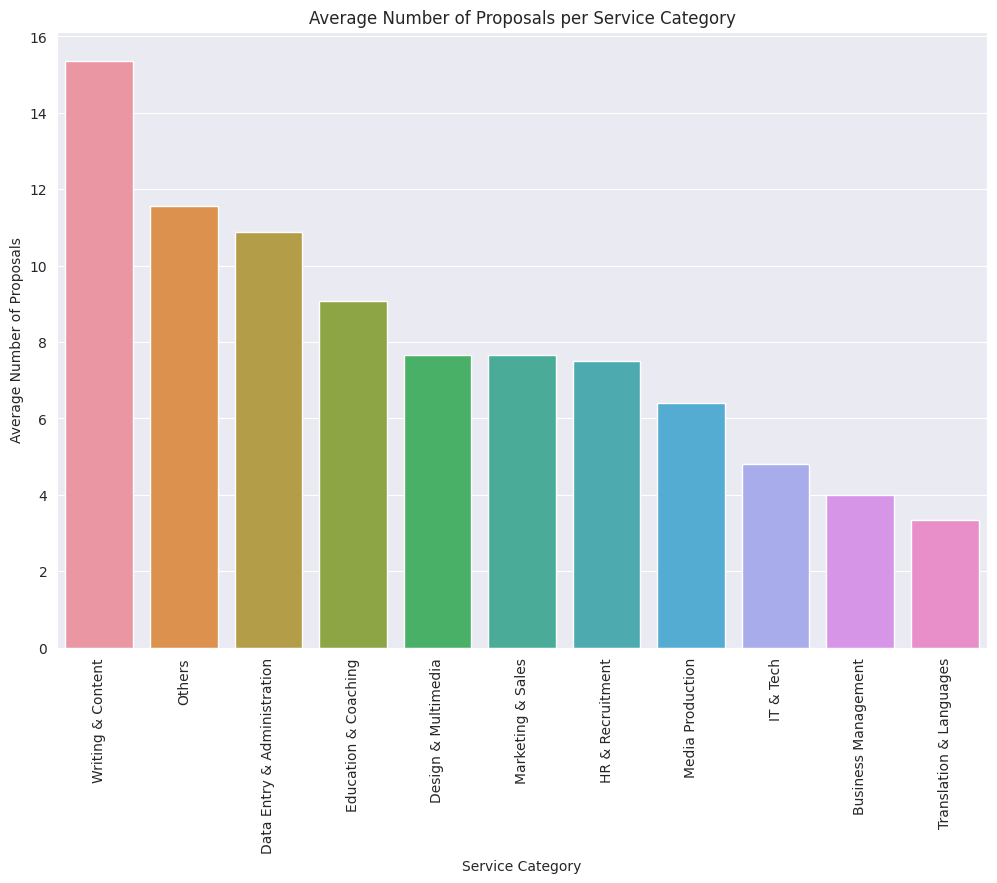

In [25]:
freelance['proposals'] = freelance['proposals'].astype(int)


# Compute the average number of proposals for each category
avg_proposals_per_category = freelance.groupby('service category')['proposals'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=avg_proposals_per_category.index, y=avg_proposals_per_category.values)
plt.xlabel('Service Category')
plt.ylabel('Average Number of Proposals')
plt.title('Average Number of Proposals per Service Category')
plt.xticks(rotation=90)
plt.show()

### **Classification using logistic regression**

In [42]:
#create data frame with all columns except post time
dataf = pd.DataFrame(df.loc[:,['title','proposing agent','type of company' ,'service category', 'average_budget', 'proposals', 'Minimum_Experience_Levels']])

#check if target class balance
print(dataf['type of company'].value_counts())

 Startup              82
 Individual           54
 Corporate            34
 Social Enterprise     7
Name: type of company, dtype: int64


In [43]:
#encode all categorical columns except target class
label_encoder = preprocessing.LabelEncoder()
dataf['proposing agent'] = label_encoder.fit_transform(dataf['proposing agent'])
label_encoder = preprocessing.LabelEncoder()
dataf['service category'] = label_encoder.fit_transform(dataf['service category'])
label_encoder = preprocessing.LabelEncoder()
dataf['title'] = label_encoder.fit_transform(dataf['title'])
dataf.head

<bound method NDFrame.head of      title  proposing agent type of company  service category  average_budget  \
0      105               35      Individual                 9          6500.0   
1       72               76      Individual                 6          2199.0   
2       22               70         Startup                 6          2100.0   
3       20               80      Individual                 1          7500.0   
4       51               47       Corporate                 6         11500.0   
..     ...              ...             ...               ...             ...   
172     59               27       Corporate                 5         10000.0   
173      2               74         Startup                 1          7500.0   
174     42               14         Startup                 2          4000.0   
175     50               14         Startup                 6          5000.0   
176     50               62       Corporate                 6          6000.0  

In [47]:
X = dataf.drop('type of company',axis=1)
y = dataf['type of company']

In [48]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(141, 6) (36, 6) (141,) (36,)


In [49]:
#Classification using logistic regression(best accuracy between all classification models)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Repeats Stratified K-Fold n times
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #the mean accuracy for each model and the SD

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


LR: 0.482381 (0.162269)
KNN: 0.467143 (0.123396)
CART: 0.560000 (0.119318)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


NB: 0.447619 (0.129887)
SVM: 0.503810 (0.060564)


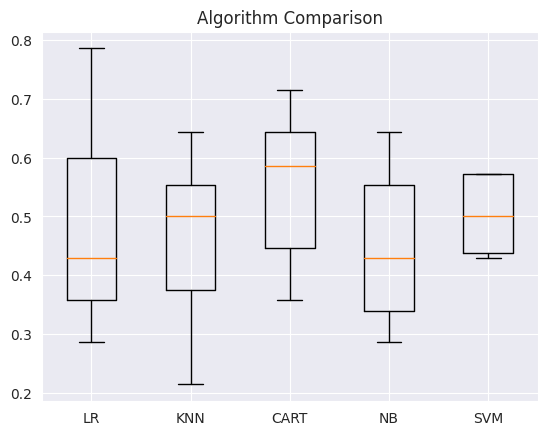

In [51]:
# Compare models' accuracy 
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()